### Dataset

Link Dataset : https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction

### Import Libraries

In [29]:
#Import Librari dan Baca Dataset
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

### Load Dataset

In [30]:
data = pd.read_csv(r"Dataset/loan_data.csv")
data.head().style.background_gradient(cmap = 'viridis', axis = 1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.000000,360.000000,1.000000,Urban,Y


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


### Preprocessing

In [32]:
df = data
df["LoanAmount"] = df["LoanAmount"]*1000
df["LoanAmount"]

0      128000.0
1       66000.0
2      120000.0
3      141000.0
4       95000.0
         ...   
376    128000.0
377    108000.0
378     71000.0
379     40000.0
380    133000.0
Name: LoanAmount, Length: 381, dtype: float64

In [33]:
df["Gender"] = np.where((df["Gender"]=="Male"), 1, np.where((df["Gender"]=="Female"), 0, np.nan))
df["Married"] = np.where((df["Married"]=="Yes"),1,0)
df["Education"] = np.where((df["Education"]=="Graduate"),1,0)
df["Self_Employed"] = np.where((df["Self_Employed"]=="Yes"),1 ,np.where((df["Self_Employed"]=="No"),0,np.nan))
df["Loan_Status"] = np.where((df["Loan_Status"]=="Y"),1,0)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1,1,0.0,4583,1508.0,128000.0,360.0,1.0,Rural,0
1,LP001005,1.0,1,0,1,1.0,3000,0.0,66000.0,360.0,1.0,Urban,1
2,LP001006,1.0,1,0,0,0.0,2583,2358.0,120000.0,360.0,1.0,Urban,1
3,LP001008,1.0,0,0,1,0.0,6000,0.0,141000.0,360.0,1.0,Urban,1
4,LP001013,1.0,1,0,0,0.0,2333,1516.0,95000.0,360.0,1.0,Urban,1


In [35]:
df["Loan_Amount_Term"] = np.where((df["Loan_Amount_Term"]>=360),1,np.where((df["Loan_Amount_Term"]<360),0,np.nan))

In [36]:
df.rename(columns = {"Loan_Amount_Term" : "Long_term" , "Education" : "Graduated"} , inplace = True)

In [37]:
df.drop(["Loan_ID"] , axis = 1 , inplace = True)

In [38]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [39]:
x=0
for i in (df.isnull().any().values):
  if i:
    df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
  x+=1

C:\Users\firea\AppData\Local\Temp\ipykernel_18124\12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
C:\Users\firea\AppData\Local\Temp\ipykernel_18124\12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [40]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Graduated            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Long_term            False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [41]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [42]:
quantile = df[["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]].quantile([0.25,0.5,0.75])
for i in ["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]:
    q1 = quantile[i][0.25]-(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    q2 = quantile[i][0.75]+(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    index = (df[(df[i]<q1) | (df[i]>q2)]).index
    df.drop(index , axis = 0 , inplace = True)

<Axes: >

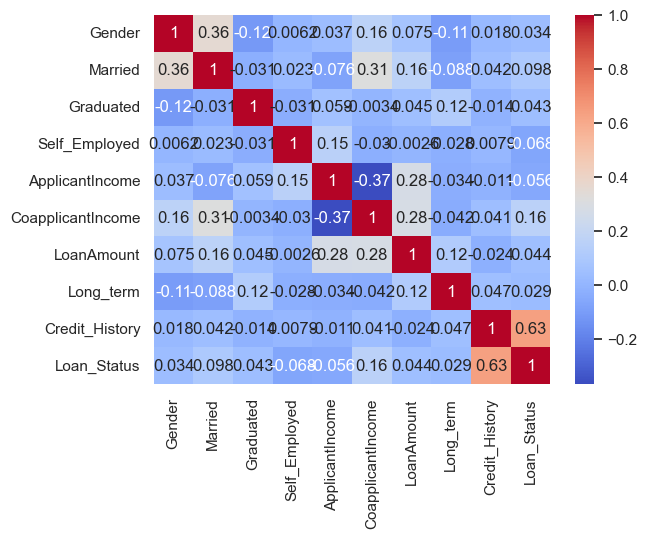

In [43]:
df_cor =df.corr(numeric_only=True)
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

In [44]:
df_new = pd.get_dummies(df , columns = ["Dependents" , "Property_Area"])
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
107,1.0,1,1,0.0,2045,1619.0,101000.0,1.0,1.0,1,False,False,True,False,True,False,False
200,1.0,1,0,0.0,3399,1640.0,111000.0,0.0,1.0,1,False,True,False,False,False,False,True
118,0.0,0,0,0.0,1907,2365.0,120000.0,1.0,1.0,1,True,False,False,False,False,False,True
127,1.0,0,1,0.0,3418,0.0,127000.0,1.0,1.0,0,True,False,False,False,False,True,False
87,1.0,1,1,1.0,3316,3500.0,88000.0,1.0,1.0,1,False,False,True,False,False,False,True


In [45]:
df_new.drop(columns = ["Dependents_0" , "Property_Area_Rural"] , axis = 1 , inplace = True)
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
86,0.0,1,1,0.0,4583,0.0,84000.0,1.0,1.0,0,False,False,False,False,False
210,1.0,0,1,0.0,4384,1793.0,117000.0,1.0,1.0,1,True,False,False,False,True
147,1.0,1,1,0.0,3315,0.0,96000.0,1.0,1.0,1,True,False,False,True,False
322,1.0,0,0,0.0,3598,1287.0,100000.0,1.0,1.0,0,False,False,False,False,False
106,1.0,1,1,0.0,3497,1964.0,116000.0,1.0,1.0,1,False,False,False,False,False


### Splitting Data

In [46]:
X = df_new.drop(columns = ["Loan_Status"] , axis = 1 )
Y = df_new["Loan_Status"]
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = 0.25 , random_state = 42)
X = X.reset_index(drop = True)
Y = Y.reset_index(drop = True)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Build Model

In [47]:
# Define the model
model = Sequential([
    Dense(units=25, input_dim=X.shape[1], activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(x_train, y_train, epochs=200, batch_size=10, validation_split=0.2, verbose=0)

d:\firea\TUGAS ML\env\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
# Evaluate the model
_, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
_, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9547169804573059
Test Accuracy: 0.8314606547355652


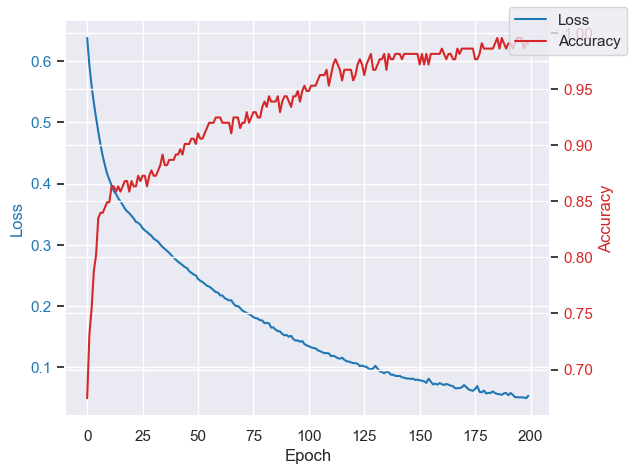

In [50]:
# Plot the training loss
# Extract loss and accuracy from the history object
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create subplots
fig, ax1 = plt.subplots()

# Plot loss on primary y-axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:blue')
ax1.plot(loss, color='tab:blue', label='Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:red')
ax2.plot(accuracy, color='tab:red', label='Accuracy')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legend
fig.tight_layout()
fig.legend(loc='upper right')

# Show plot
plt.show()

In [51]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 25)             │           375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 781 (3.05 KB)

 Trainable params: 781 (3.05 KB)

 Non-trainable params: 0 (0.00 B)

### Testing and Evaluation

In [52]:
# Predict the target variable
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Loss: {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Loss: 0.59
Accuracy: 83.15%


In [54]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the accuracy with classification report
print(classification_report(y_test, y_pred))

[[17  6]
 [ 9 57]]
              precision    recall  f1-score   support

           0       0.65      0.74      0.69        23
           1       0.90      0.86      0.88        66

    accuracy                           0.83        89
   macro avg       0.78      0.80      0.79        89
weighted avg       0.84      0.83      0.83        89

